In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker
%matplotlib inline
import calendar

In [303]:
cols_to_use = ['From Date', 'To Date', 'PM2.5','PM10']
df = pd.read_excel('ass2_data.xlsx', index_col=0, skiprows=16, usecols = cols_to_use, dropna = True)
df = df[df["PM2.5"] != "None"]
df = df[df["PM10"] != "None"]
df = df.reset_index()
df.index +=1
df["Month"] = df["From Date"].str[3:5]
#df["Date-Month"] = df["From Date"].str[:5]
#df["To Date"] = df["To Date"].str[:10]
#df["From Date"] = df["From Date"].str[:10]
df

,From Date,To Date,PM2.5,PM10,Month
1,01-01-2019 00:00,01-01-2019 01:00,517.25,950,01
2,01-01-2019 01:00,01-01-2019 02:00,531.25,939,01
3,01-01-2019 02:00,01-01-2019 03:00,542,797.25,01
4,01-01-2019 03:00,01-01-2019 04:00,547.5,526.25,01
5,01-01-2019 04:00,01-01-2019 05:00,497,776.25,01
...,...,...,...,...,...
8096,31-12-2019 17:00,31-12-2019 18:00,186,274,12
8097,31-12-2019 18:00,31-12-2019 19:00,234.5,371.75,12
8098,31-12-2019 19:00,31-12-2019 20:00,416.5,704.5,12
8099,31-12-2019 20:00,31-12-2019 21:00,549.5,847.25,12


In [304]:
df["Month_ind"] = df["Month"]
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[int(x)])
df["PM2.5"] = df["PM2.5"].astype(float)
df["PM10"] = df["PM10"].astype(float)
dfmonth = df.groupby('Month').mean()
monthDict={'Jan':1,'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
#dfmonth['Month'] = dfmonth['Month'].apply(lambda x: calendar.month_abbr[int(x)])
#dfmonth["PM2.5"] = dfmonth["PM2.5"].astype(float)
#dfmonth["PM10"] = dfmonth["PM10"].astype(float)
for i in dfmonth.index:
    dfmonth.loc[i, "val"] = monthDict[i]
dfmonth = dfmonth.sort_values(by = "val")
dfmonth = dfmonth.reset_index()

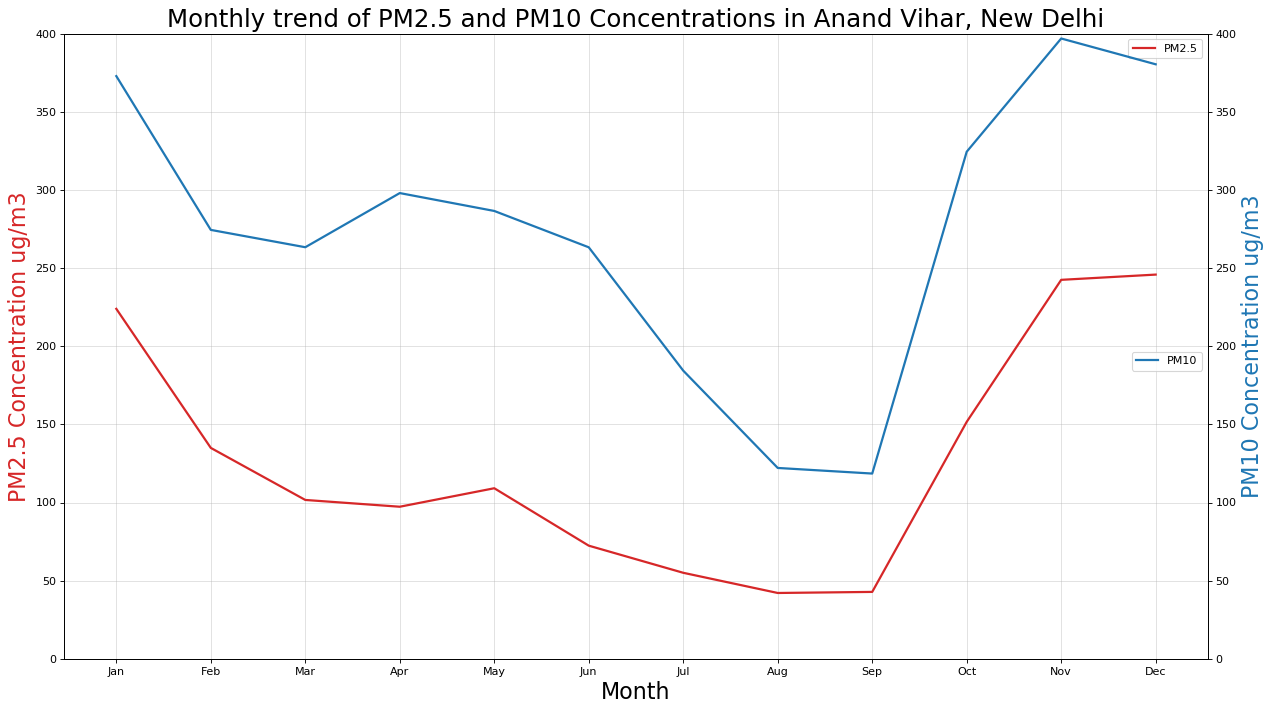

In [305]:
x = dfmonth["Month"]
y1 = dfmonth["PM2.5"].tolist()
y2 = dfmonth["PM10"].tolist()
#print(x,y1,y2)
# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(x, y1, color='tab:red', linewidth = 2)

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x, y2, color='tab:blue', linewidth = 2)

# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Month', fontsize=20)
ax1.set_ylabel('PM2.5 Concentration ug/m3', color='tab:red', fontsize=20)
ax1.grid(alpha=.4)
ax1.set_ylim(0, 400)
ax2.set_ylim(0, 400)
# ax2 (right Y axis)
ax2.set_ylabel("PM10 Concentration ug/m3", color='tab:blue', fontsize=20)
#ax2.set_xticks(np.arange(0, len(x), 60))
#ax2.set_xticklabels(x[::60], rotation=90, fontdict={'fontsize':10})
ax2.set_title("Monthly trend of PM2.5 and PM10 Concentrations in Anand Vihar, New Delhi", fontsize=22)
fig.tight_layout()
ax1.legend(['PM2.5'])
ax2.legend(['PM10'], bbox_to_anchor=(1, 0.5))
plt.show()

In [306]:
df

,From Date,To Date,PM2.5,PM10,Month,Month_ind
1,01-01-2019 00:00,01-01-2019 01:00,517.25,950.00,Jan,01
2,01-01-2019 01:00,01-01-2019 02:00,531.25,939.00,Jan,01
3,01-01-2019 02:00,01-01-2019 03:00,542.00,797.25,Jan,01
4,01-01-2019 03:00,01-01-2019 04:00,547.50,526.25,Jan,01
5,01-01-2019 04:00,01-01-2019 05:00,497.00,776.25,Jan,01
...,...,...,...,...,...,...
8096,31-12-2019 17:00,31-12-2019 18:00,186.00,274.00,Dec,12
8097,31-12-2019 18:00,31-12-2019 19:00,234.50,371.75,Dec,12
8098,31-12-2019 19:00,31-12-2019 20:00,416.50,704.50,Dec,12
8099,31-12-2019 20:00,31-12-2019 21:00,549.50,847.25,Dec,12


In [307]:
for ind in df.index:
    pm25 = df.loc[ind, "PM2.5"]
    pm10 = df.loc[ind, "PM10"]
    if (int(df.loc[ind, "Month_ind"]) <= 2 or df.loc[ind, "Month"] == 12):
        df.loc[ind, "Season"] = "Winter"
    elif (int(df.loc[ind, "Month_ind"]) <= 5):
        df.loc[ind, "Season"] = "Pre-monsoon"
    elif (int(df.loc[ind, "Month_ind"]) <= 8):
        df.loc[ind, "Season"] = "Monsoon"
    else:
        df.loc[ind, "Season"] = "Post-monsoon"
    if (pm10 < 51):
        df.loc[ind, "I_PM10"] = (50-0) * (pm10-0) /(50-0) + 0
    elif (pm10 < 101):
        df.loc[ind, "I_PM10"] = (100-51) * (pm10 - 51) / (100 - 51) + 51
    elif (pm10 < 251):
        df.loc[ind, "I_PM10"] = (200-101) * (pm10 - 101) / (250 - 101) + 101
    elif (pm10 < 351):
        df.loc[ind, "I_PM10"] = (300-201) * (pm10 - 251) / (350 - 251) + 201
    elif (pm10 < 431):
        df.loc[ind, "I_PM10"] = (400-301) * (pm10 - 351) / (430 - 351) + 301
    else :
        df.loc[ind, "I_PM10"] = 500
    
    if (pm25 < 31):
        df.loc[ind, "I_PM2.5"] = (50-0) * (pm25 - 0) / (30-0)+ 0
    elif (pm25 < 61):
        df.loc[ind, "I_PM2.5"] = (100-51) * (pm25 - 31)/ (60-31) + 51
    elif (pm25 < 91):
        df.loc[ind, "I_PM2.5"] = (200-101) * (pm25 - 61)/(90-61) + 101
    elif (pm25 < 121):
        df.loc[ind, "I_PM2.5"] = (300-201) * (pm25 - 91)/(120-91) + 201
    elif (pm25 < 251):
        df.loc[ind, "I_PM2.5"] = (400-301) * (pm25 - 121)/(250-121) + 301
    else:
        df.loc[ind, "I_PM2.5"] = 500
        
df["I_PM2.5"] = df["I_PM2.5"].astype(float)
#df

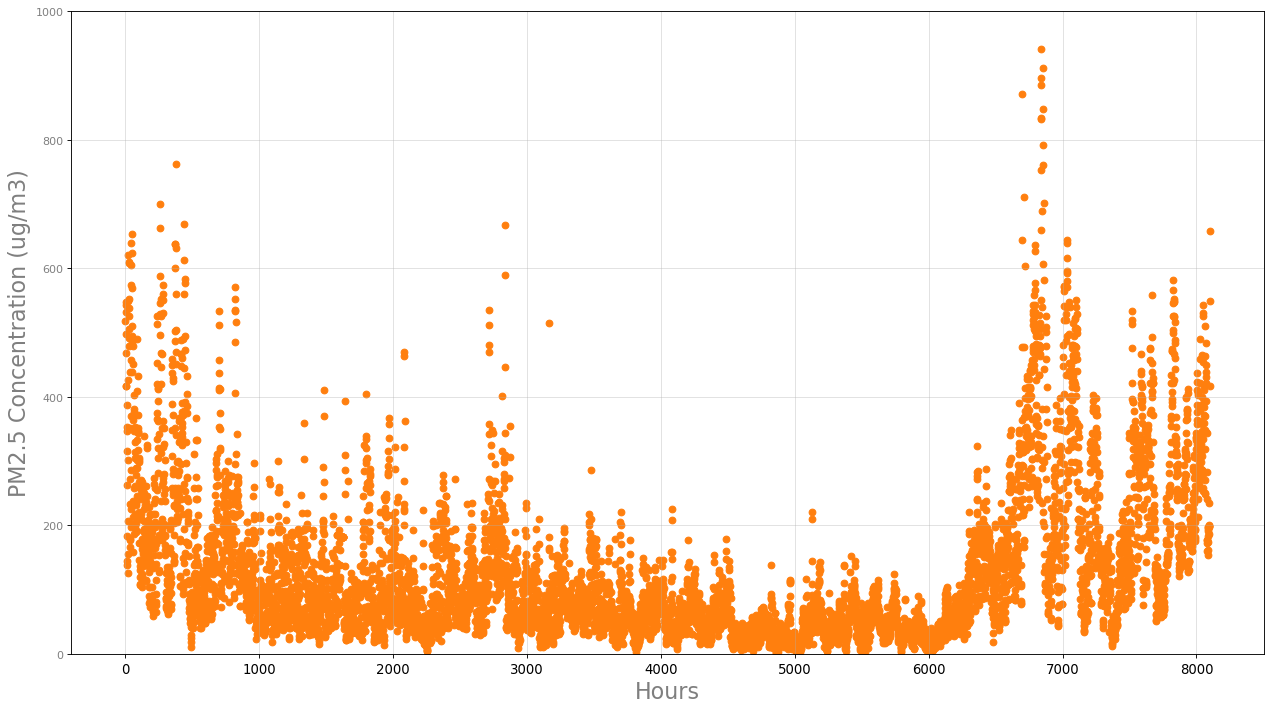

In [308]:
x = df.index
y1 = df['PM2.5']

# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.scatter(x, y1, color='tab:orange')

ax1.set_xlabel('Hours', fontsize=20, color = 'tab:grey')
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('PM2.5 Concentration (ug/m3)', color='tab:grey', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:grey' )
ax1.grid(alpha=.4)
ax1.set_ylim(0,1000)
fig.tight_layout()
#plt.show()


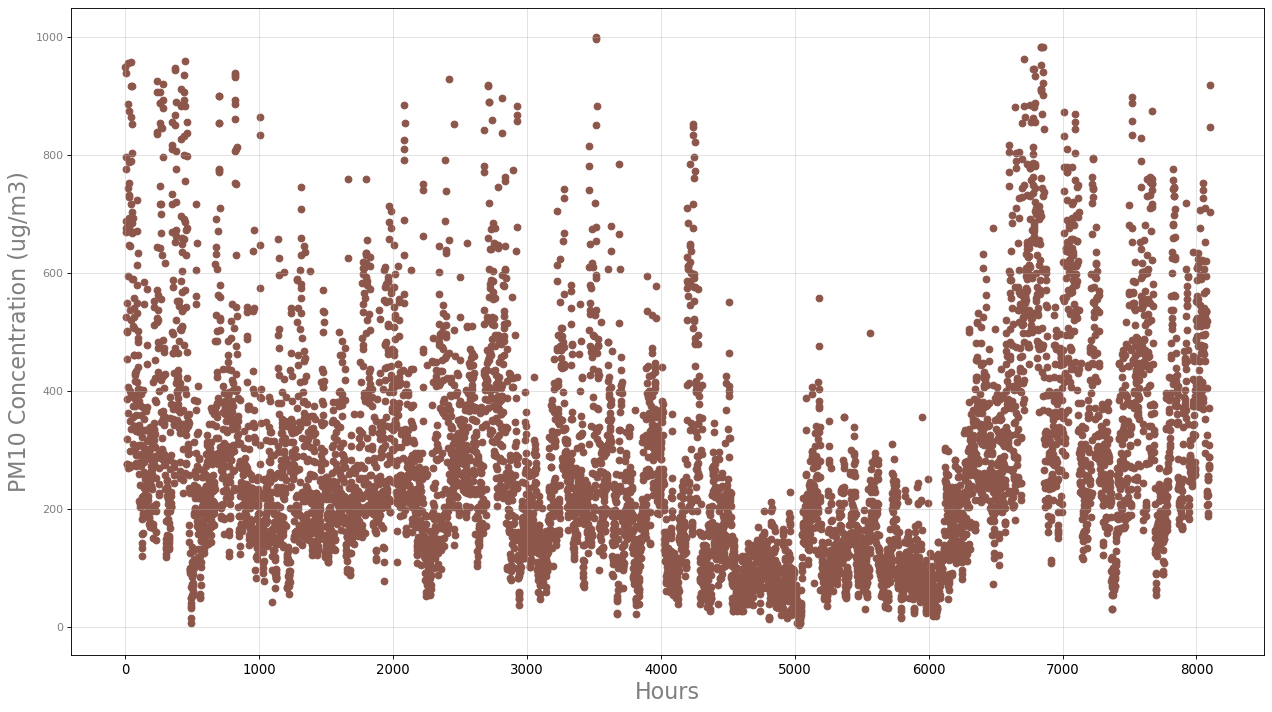

In [309]:
x = df.index
y1 = df['PM10']

# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.scatter(x, y1, color='tab:brown')

ax1.set_xlabel('Hours', fontsize=20, color = 'tab:grey')
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('PM10 Concentration (ug/m3)', color='tab:grey', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:grey' )
ax1.grid(alpha=.4)

fig.tight_layout()
#plt.show()

In [311]:
#dframe = df.groupby('Month').mean()
df["PM10"] = df["PM10"].astype(float)
df["PM2.5"] = df["PM2.5"].astype(float)
dfseason = df.groupby('Season').mean()
dfseason = dfseason.reset_index()
lst = [2,3,1,0]
for x in dfseason.index:
    dfseason.loc[x, "val"] = int(lst[x])
dfseason = dfseason.sort_values(by=['val'], ascending=True)
dfseason

,Season,PM2.5,PM10,I_PM10,I_PM2.5,val
3,Winter,190.259028,335.609200,273.651489,316.488789,0.0
2,Pre-monsoon,102.631635,282.670142,245.248733,201.031951,1.0
0,Monsoon,56.594943,190.360926,166.608262,108.919860,2.0
1,Post-monsoon,168.022336,301.936287,258.195489,269.769898,3.0


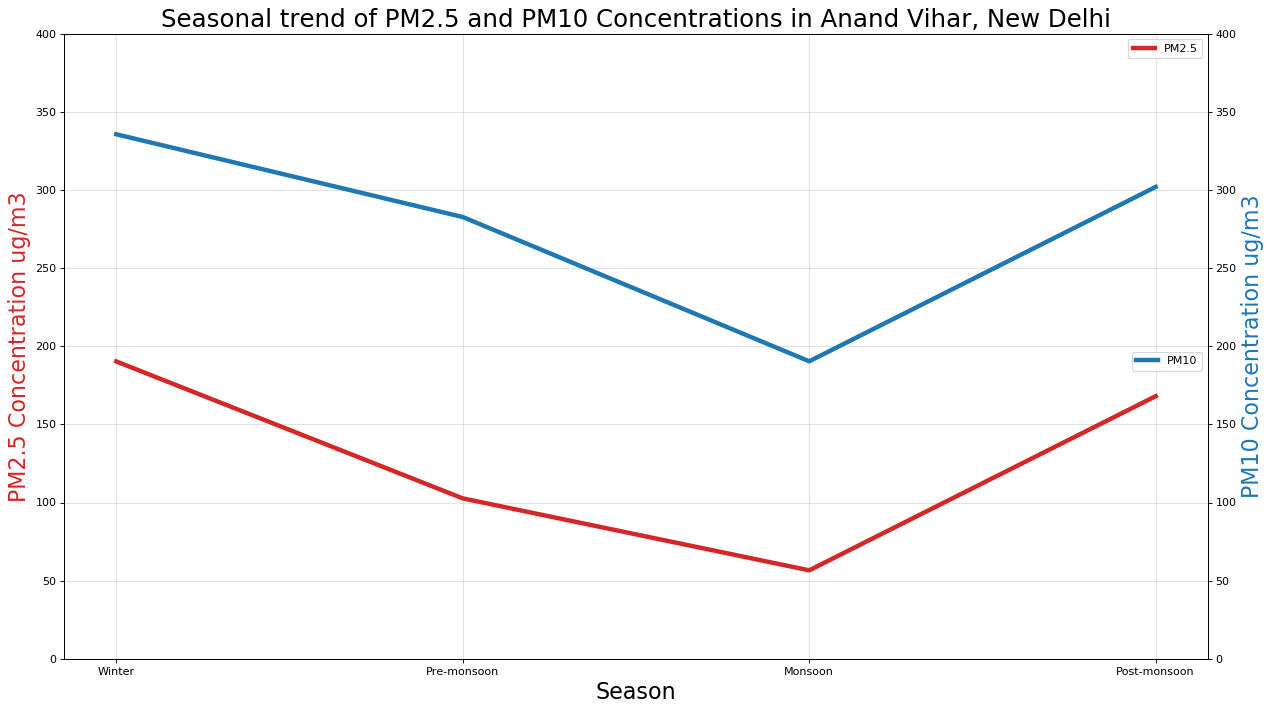

In [312]:
x = dfseason["Season"].tolist()
y1 = dfseason["PM2.5"].tolist()
y2 = dfseason["PM10"].tolist()
#print(x,y1,y2)
# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(x, y1, color='tab:red', linewidth = 4)

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x, y2, color='tab:blue', linewidth = 4)

# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Season', fontsize=20)
ax1.set_ylabel('PM2.5 Concentration ug/m3', color='tab:red', fontsize=20)
ax1.grid(alpha=.4)
ax1.set_ylim(0, 400)
ax2.set_ylim(0, 400)
# ax2 (right Y axis)
ax2.set_ylabel("PM10 Concentration ug/m3", color='tab:blue', fontsize=20)
#ax2.set_xticks(np.arange(0, len(x), 60))
#ax2.set_xticklabels(x[::60], rotation=90, fontdict={'fontsize':10})
ax2.set_title("Seasonal trend of PM2.5 and PM10 Concentrations in Anand Vihar, New Delhi", fontsize=22)
fig.tight_layout()
ax1.legend(['PM2.5'])
ax2.legend(['PM10'], bbox_to_anchor=(1, 0.5))
plt.show()